In [2]:
import pandas as pd
import os

In [3]:
os.listdir()

['embeddings_meds.csv',
 'Medicine_Embeddings_Link_Prediction.ipynb',
 '.DS_Store',
 'disease_cause.csv',
 'medicine_side_effects.csv',
 'Medicine_Embeddings_Clustering.ipynb',
 'medicine_uses.csv',
 'disease_specialty.csv',
 'embeddigs_diseases.csv',
 'disease_link_prediction.ipynb',
 '.ipynb_checkpoints',
 'application.log',
 'diseases_embedding.ipynb',
 'disease_symptoms.csv']

In [9]:
def func(x):
    x = x.strip()
    x = x.replace('"', '')
    return x

In [4]:
final_df = pd.read_csv('embeddigs_diseases.csv')

In [10]:
final_df['subject']=final_df['subject'].map(func)

In [11]:
final_df['predicate'] = final_df['predicate']

In [12]:
final_df['object'] = final_df['object'].map(func)

In [13]:
final_df.to_csv('embeddigs_diseases.csv',index=False)

In [14]:
import ampligraph
import numpy as np

In [15]:
from ampligraph.evaluation import train_test_split_no_unseen
from ampligraph.datasets import load_from_csv


In [16]:
X = load_from_csv('.','embeddigs_diseases.csv',sep=',')

In [17]:
X

array([['subject', 'predicate', 'object'],
       ['encephalitis', 'Cause', 'rabies'],
       ['bacterial vaginosis', 'Cause', 'Gardnerella vaginalis'],
       ...,
       ['acrodermatitis enteropathica', 'Symptom', 'alopecia'],
       ['Lassa fever', 'Symptom', 'alopecia'],
       ['mercury poisoning', 'Symptom', 'proteinuria']], dtype=object)

In [18]:
X = X[1:]

In [19]:
X.shape[0]

9552

In [20]:
print(X.shape)

(9552, 3)


In [21]:
from ampligraph.latent_features import ComplEx

model = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

In [22]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(X)


Average Loss:   0.189599: 100%|██████████| 300/300 [06:25<00:00,  1.28s/epoch]


In [23]:
len(set(X[:,0]))

6150

In [37]:
diseases =np.array(list(set(X[:,0])))
disease_embeddings = dict(zip(diseases, model.get_embeddings(diseases)))
len(diseases)

6150

In [38]:
len(dict(zip(diseases,(model.get_embeddings(diseases)))))

6150

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in disease_embeddings.values()]))


In [53]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans,DBSCAN,OPTICS

clustering_algorithm = DBSCAN(eps=0.3,min_samples=4)
clusters = find_clusters(diseases, model, clustering_algorithm, mode='entity')

In [52]:
len(clusters)

6150

In [54]:
cluster = ['cluster19','cluster1','cluster14','cluster3','cluster23','cluster11','cluster4']
title =['Respiratory System Related','Infectious Disease Related','Diabetes Related','Cancer Related','Urology',
        'hematology','gastro related']
d = {}
for i,c in enumerate(cluster):
    d[c] = title[i]

In [55]:
plot_df = pd.DataFrame({"diseases": diseases, 
                        "embedding1": embeddings_2d[:, 0], 
                        "embedding2": embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

In [56]:
plot_df_display =plot_df[(plot_df['cluster']=='cluster19')|(plot_df['cluster']=='cluster1')|(plot_df['cluster']=='cluster14')
       |(plot_df['cluster']=='cluster3')|(plot_df['cluster']=='cluster23')|(plot_df['cluster']=='cluster11')
        |(plot_df['cluster']=='cluster4')]

In [57]:
def plot_clusters(hue):
    np.random.seed(0)
    plt.figure(figsize=(20, 15))
    plt.title("{} embeddings".format(hue).capitalize())
    
    
   
    ax = sns.scatterplot(data=plot_df_display, x="embedding1", y="embedding2", hue=hue)
    leg_handles = ax.get_legend_handles_labels()[0]
    ax.legend(leg_handles,d.values(), title='New legend')
    
    
    data=plot_df[plot_df.diseases!="unk"]
    texts = []
    
    

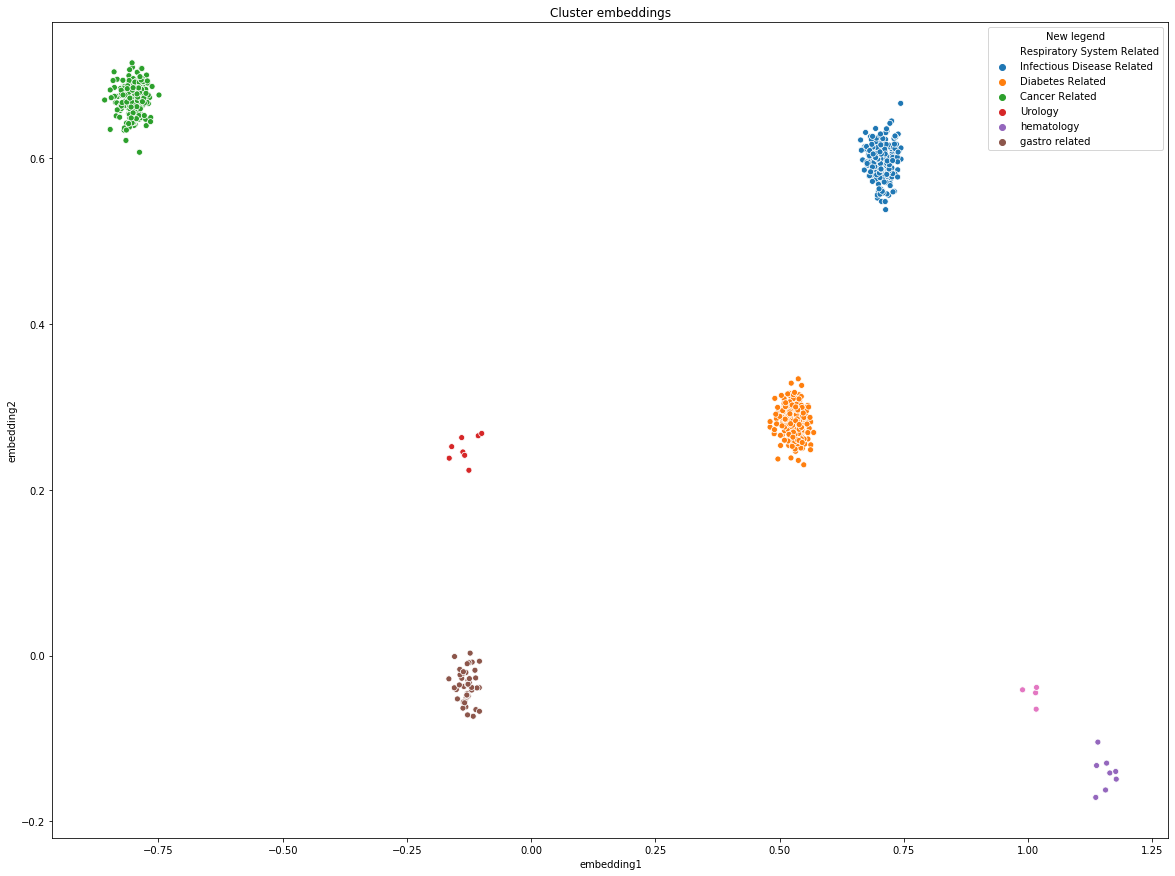

In [58]:
plot_clusters('cluster')

In [786]:
_ih[-5:]

["plot_df_display =plot_df[(plot_df['cluster']=='cluster19')|(plot_df['cluster']=='cluster1')|(plot_df['cluster']=='cluster14')\n       |(plot_df['cluster']=='cluster3')|(plot_df['cluster']=='cluster23')|(plot_df['cluster']=='cluster11')\n        |(plot_df['cluster']=='cluster4')]",
 'def plot_clusters(hue):\n    np.random.seed(0)\n    plt.figure(figsize=(20, 15))\n    plt.title("{} embeddings".format(hue).capitalize())\n    \n    \n   \n    ax = sns.scatterplot(data=plot_df_display, x="embedding1", y="embedding2", hue=hue)\n    leg_handles = ax.get_legend_handles_labels()[0]\n    ax.legend(leg_handles,d.values(), title=\'New legend\')\n    \n    \n    data=plot_df[plot_df.diseases!="unk"]\n    texts = []\n    \n    ',
 "plot_clusters('cluster')",
 "clusters = ['cluster19','cluster1','cluster14','cluster3','cluster23','cluster11','cluster4']\ntitle =['Respiratory System Related','Infectious Disease Related','Diabetes Related','Cancer Related','Urology',\n        'hematology','gastro re

In [88]:
df = pd.DataFrame(columns=d.values())

In [89]:
df

,Respiratory System Related,Infectious Disease Related,Diabetes Related,Cancer Related,Urology,hematology,gastro related


In [82]:
cluster

['cluster19',
 'cluster1',
 'cluster14',
 'cluster3',
 'cluster23',
 'cluster11',
 'cluster4']

In [90]:
for i in range(1):
    a =[]
    for c in cluster:
        
        temp = plot_df[plot_df['cluster']==c]['diseases'].iloc[i]
        a.append(temp)
    
    df.loc[len(df)] = a

In [91]:
df

,Respiratory System Related,Infectious Disease Related,Diabetes Related,Cancer Related,Urology,hematology,gastro related
0,root caries,carcinoma in situ of respiratory system,ascending aortic aneurysm,primary ciliary dyskinesia 18,drusen,uveal disease,MECP2 duplication syndrome


In [108]:
plot_df[plot_df['cluster']=='cluster6']

,diseases,embedding1,embedding2,cluster
14,ethylmalonic encephalopathy,0.124398,-0.942268,cluster6
61,retinal perforation,0.138681,-0.931156,cluster6
87,post-head injury coma,0.147180,-0.905194,cluster6
91,dystonia 25,0.137652,-0.923399,cluster6
109,spinocerebellar ataxia type 6,0.140305,-0.928349,cluster6
...,...,...,...,...
6053,mast syndrome,0.162916,-0.960212,cluster6
6059,photosensitive epilepsy,0.166804,-0.916539,cluster6
6061,Benedikt syndrome,0.162608,-0.898490,cluster6
6063,Hereditary neuralgic amyotrophy,0.156072,-0.899177,cluster6


In [107]:
final_df[final_df['subject']=='thrombophlebitis']

,subject,predicate,object
6688,thrombophlebitis,Specialty,cardiology


In [ ]:
plot_df_display =plot_df[(plot_df['cluster']=='cluster19')|(plot_df['cluster']=='cluster1')

In [110]:
cluster = ['cluster2','cluster5']
title =['Cancer', 'Cardiology']
d = {}
for i,c in enumerate(cluster):
    d[c] = title[i]

In [114]:
df = pd.DataFrame(columns=d.values())

In [115]:
for i in range(30):
    a =[]
    for c in cluster:
        
        temp = plot_df[plot_df['cluster']==c]['diseases'].iloc[i]
        a.append(temp)
    
    df.loc[len(df)] = a

In [116]:
df

,Cancer,Cardiology
0,dysplasia,thrombophlebitis
1,occipital lobe neoplasm,acute inferoposterior infarction
2,jejunal cancer,Brugada syndrome 1
3,alveolar soft part sarcoma,ventricular tachycardia
4,anaplastic astrocytoma,dilated cardiomyopathy 3B
5,glomus tumor,vertebral artery occlusion
6,testicular cancer,Brugada syndrome 7
7,pilomatrixoma,Monckeberg arteriosclerosis
8,epithelioid sarcoma,long QT syndrome 14
9,medulloepithelioma,atrioventricular block


In [117]:
df.to_csv('disease_categories.csv',index=False)